In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Load the dataset
df = pd.read_csv('/Users/udayyy/Data visualization /train.csv')

# Inspect the data
print(df.head())
print(df.info())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-n

In [2]:
# --- Preprocessing & Feature Engineering ---
# Convert datetime to a proper datetime object
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['dayofweek'] = df['datetime'].dt.day_name()
# Define numerical columns
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
# Map Season to readable names
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season'] = df['season'].map(season_map)

# Map Weather to readable names
weather_map = {
    1: 'Clear/Cloudy', 
    2: 'Mist/Cloudy', 
    3: 'Light Snow/Rain', 
    4: 'Heavy Rain/Ice'
}
df['weather'] = df['weather'].map(weather_map)

# Map Workingday for better legends
df['workingday_label'] = df['workingday'].map({0: 'Non-Working', 1: 'Working'})

1. Plot the distributions of all the numerical columns in the dataset using
histograms.

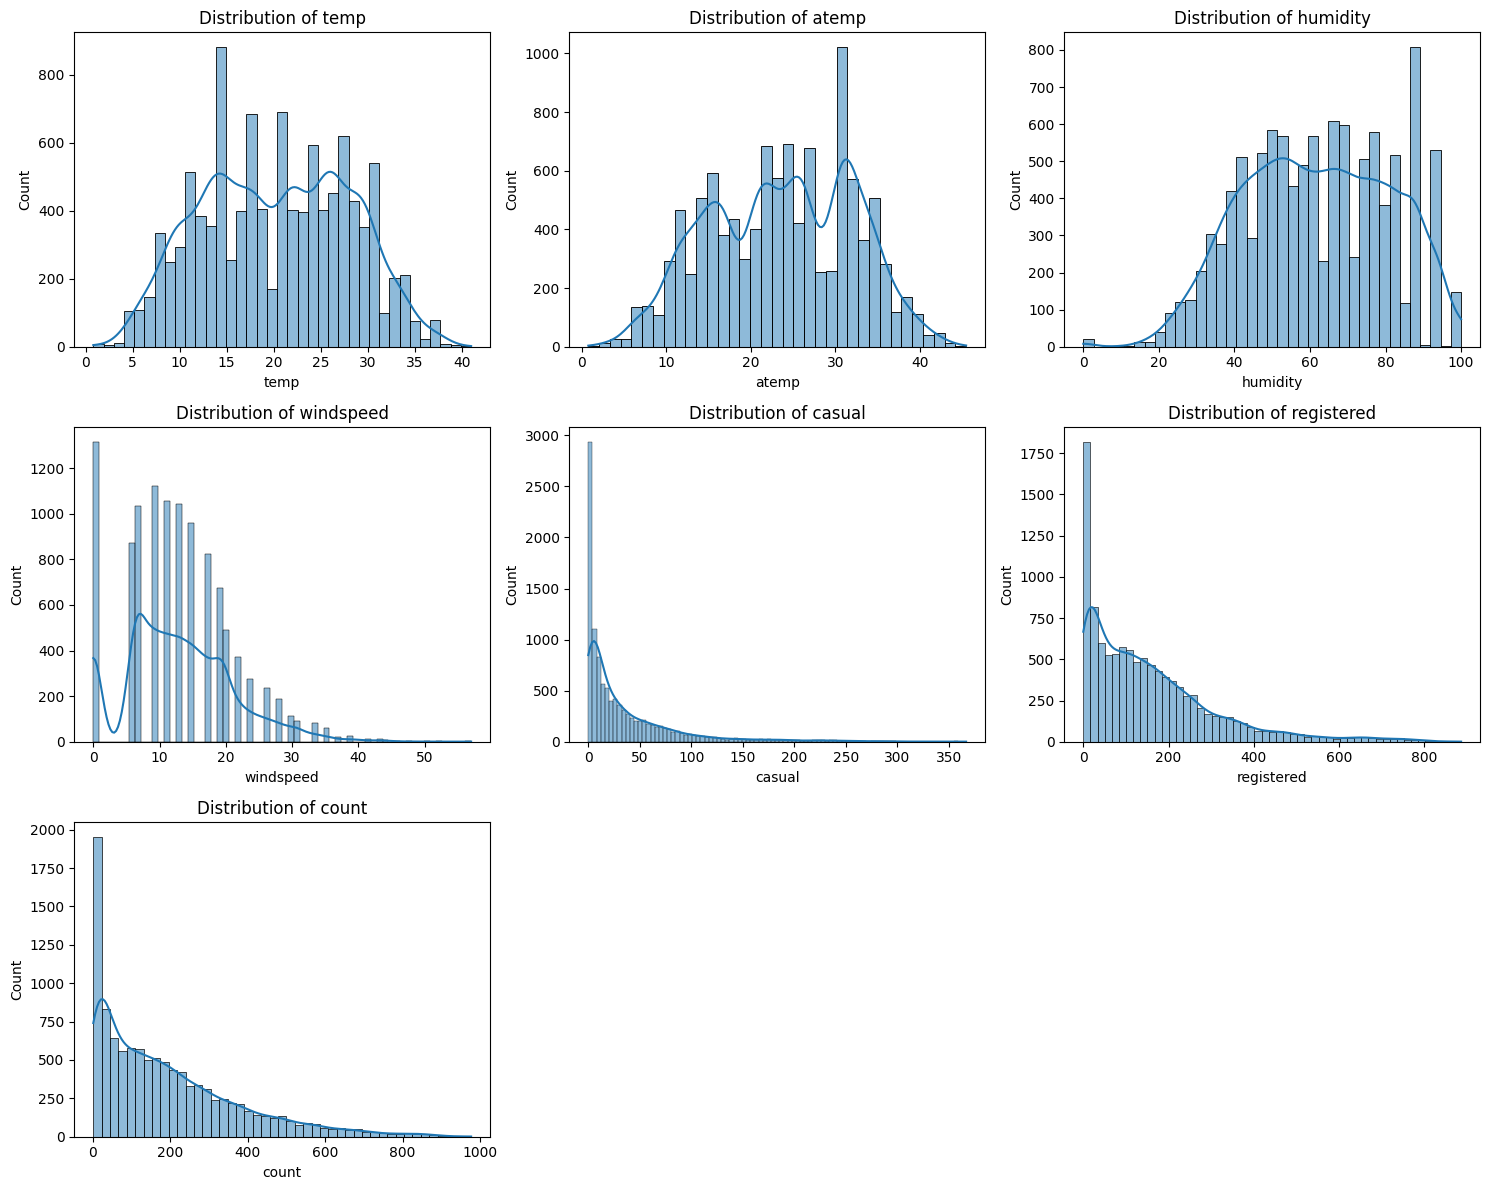

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Remove empty subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

2. Plot the distributions of all the numerical columns in the dataset using box
plots.


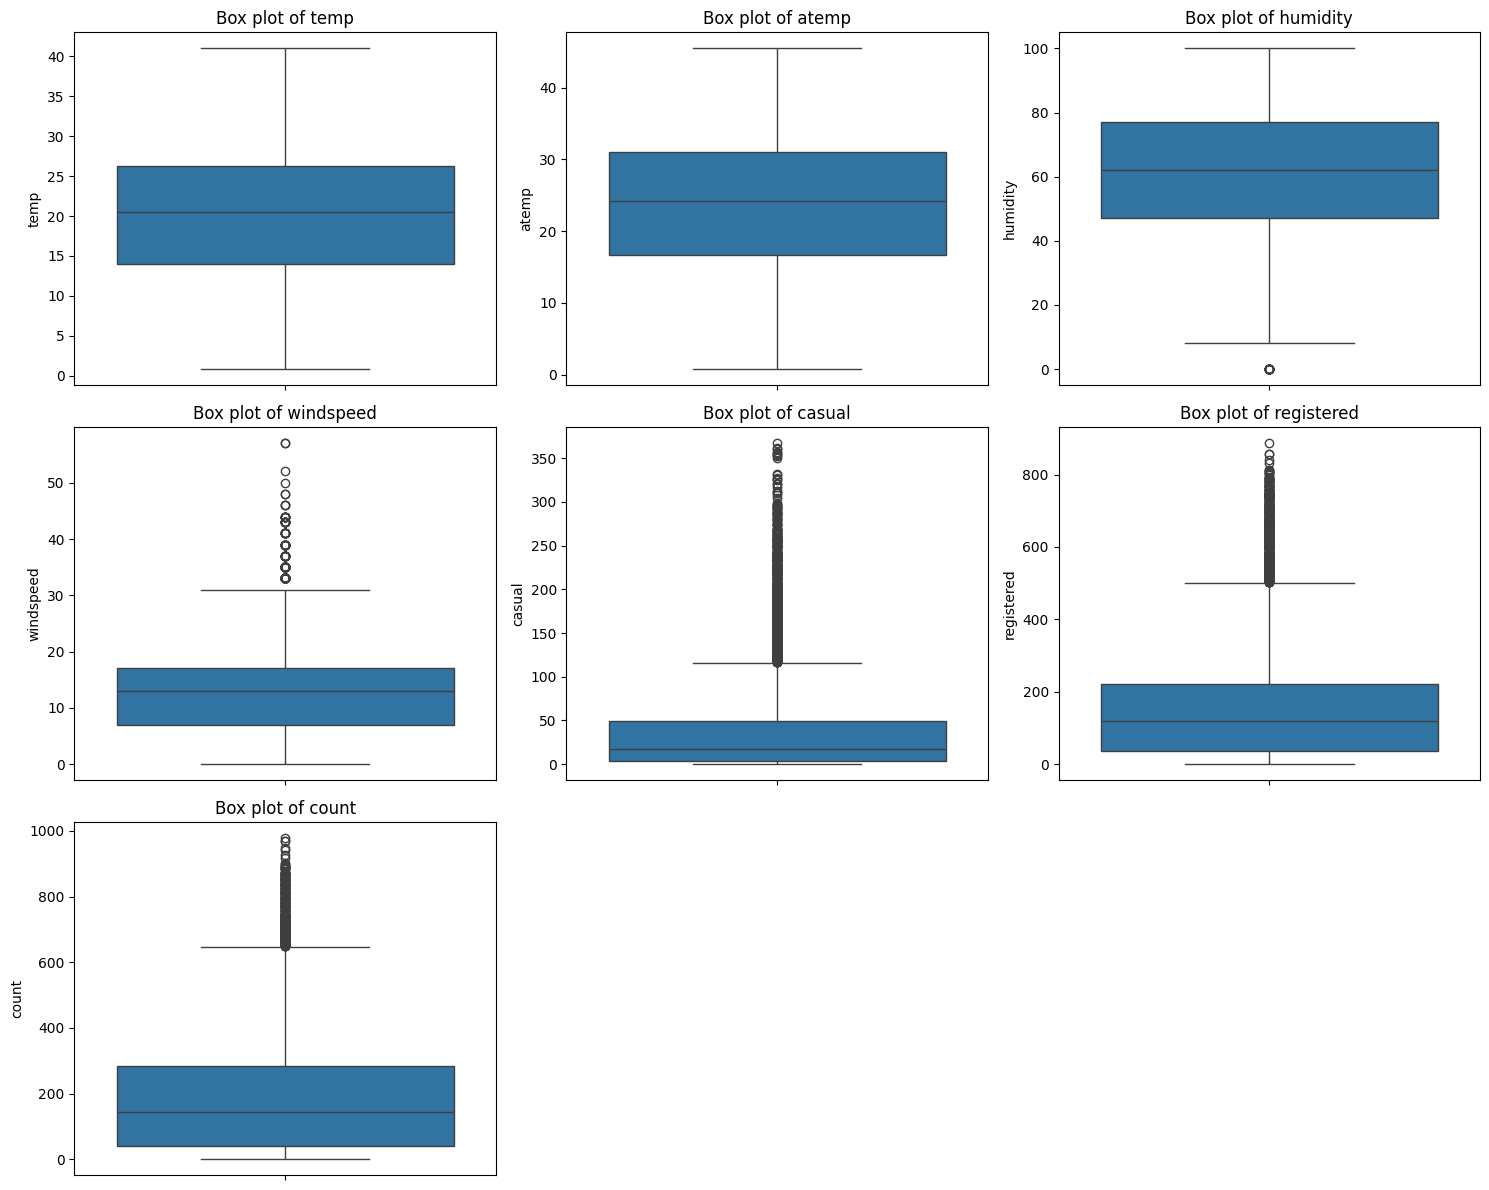

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')

for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

3. Plot the the mean of the hourly total rentals count for working and non-
working days.

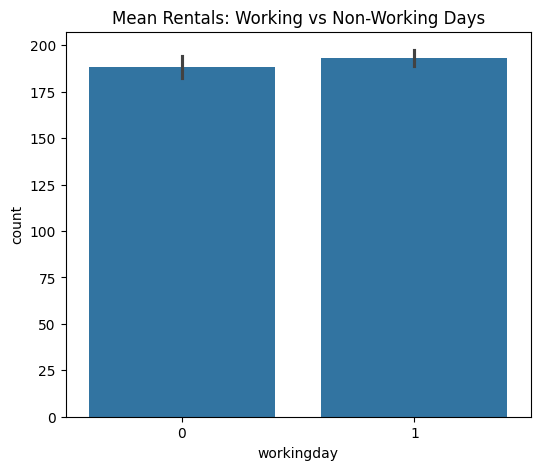

In [5]:
plt.figure(figsize=(6, 5))
sns.barplot(x='workingday', y='count', data=df)
plt.title('Mean Rentals: Working vs Non-Working Days')
plt.show()

4. Plot the the mean of the hourly total rentals count for the different months for
both years combined.

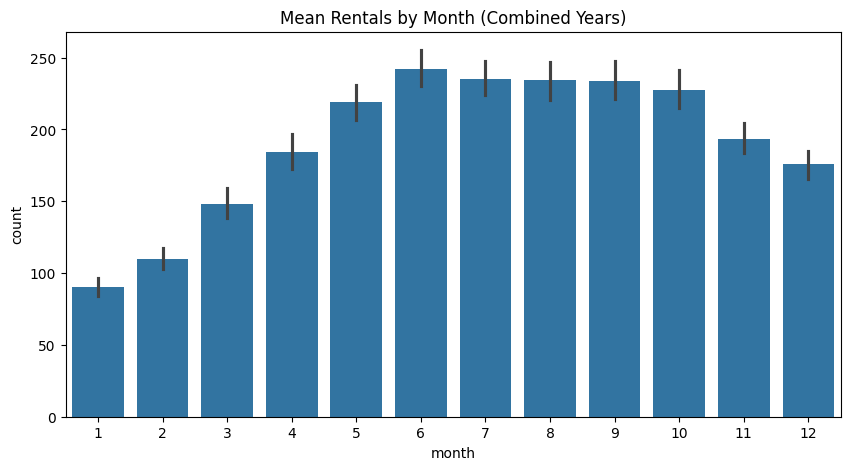

In [6]:
plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='count', data=df)
plt.title('Mean Rentals by Month (Combined Years)')
plt.show()

5. Plot the the mean of the hourly total rentals count for the different months for
both years separately in a multi-panel figure.

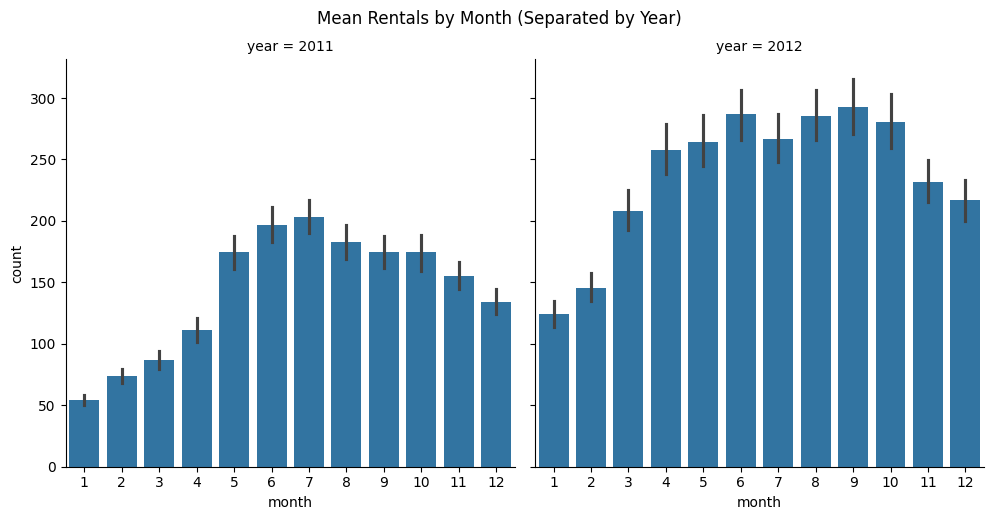

In [7]:
g = sns.catplot(x='month', y='count', col='year', data=df, kind='bar')
g.fig.suptitle('Mean Rentals by Month (Separated by Year)', y=1.03)
plt.show()

6. Plot the the mean and the 95% confidence interval of the hourly total rentals
count for the four different weather categories. What can you observe ?

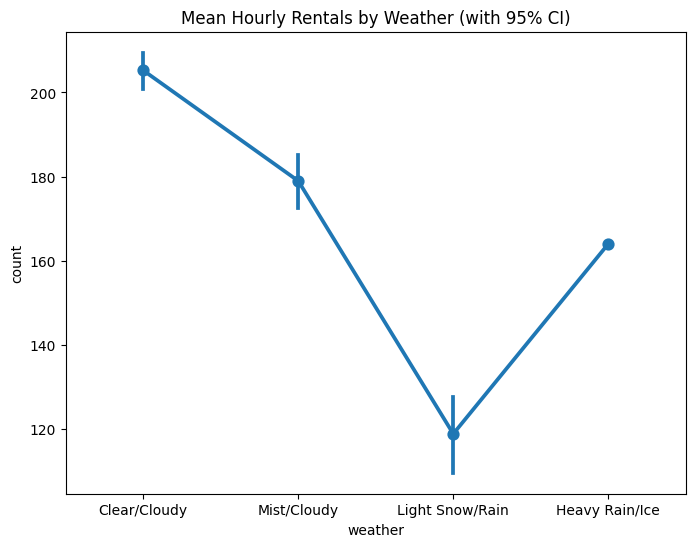

In [8]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='weather', y='count', data=df)
plt.title('Mean Hourly Rentals by Weather (with 95% CI)')
plt.savefig('task6_weather.png')

7. Plot the the mean of the hourly total rentals count versus the hour of the day.
Which hours of the day have the highest rentals count ?

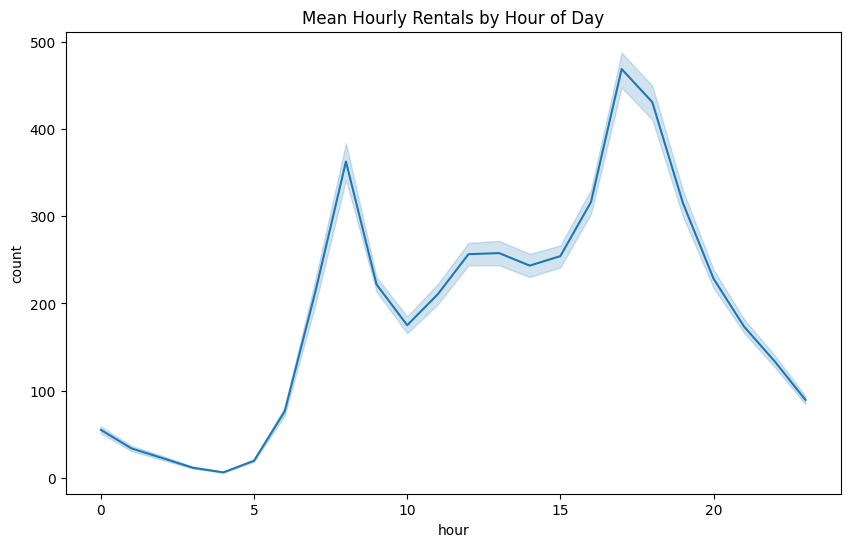

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='count', data=df)
plt.title('Mean Hourly Rentals by Hour of Day')
plt.savefig('task7_hour.png')

8. Repeat the plot in 7 for different days of the week. What patterns can you
observe ?

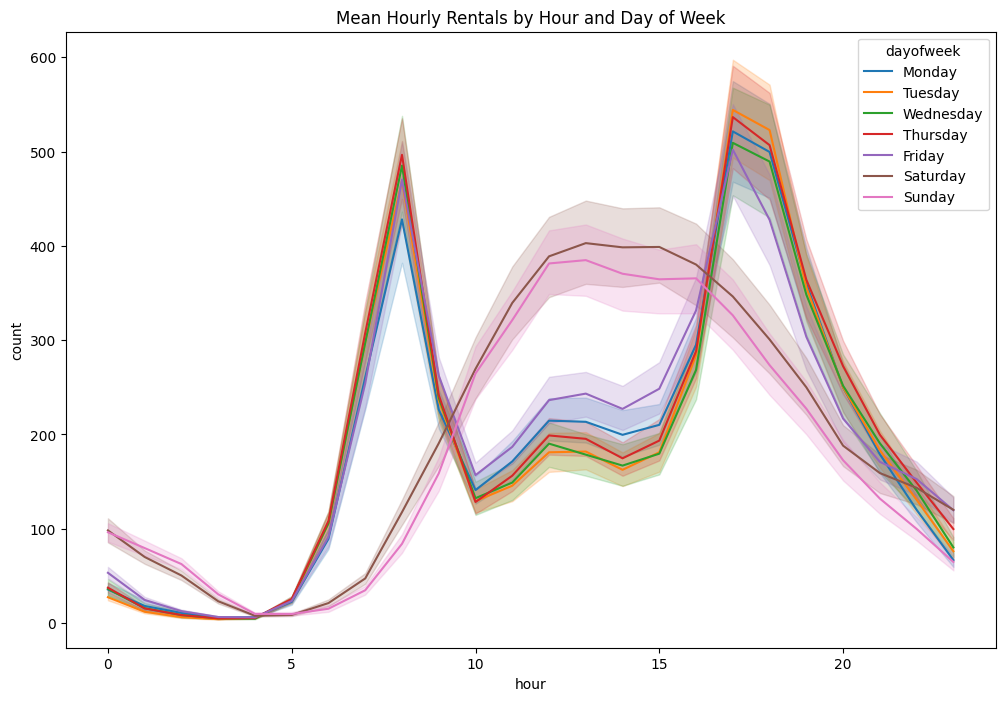

In [10]:
plt.figure(figsize=(12, 8))
# Ordering days for better readability
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.lineplot(x='hour', y='count', hue='dayofweek', hue_order=days_order, data=df)
plt.title('Mean Hourly Rentals by Hour and Day of Week')
plt.savefig('task8_hour_day.png')

9. Repeat the plot in 8 for the four seasons using a multi-panel figure. What
patterns can you observe ?

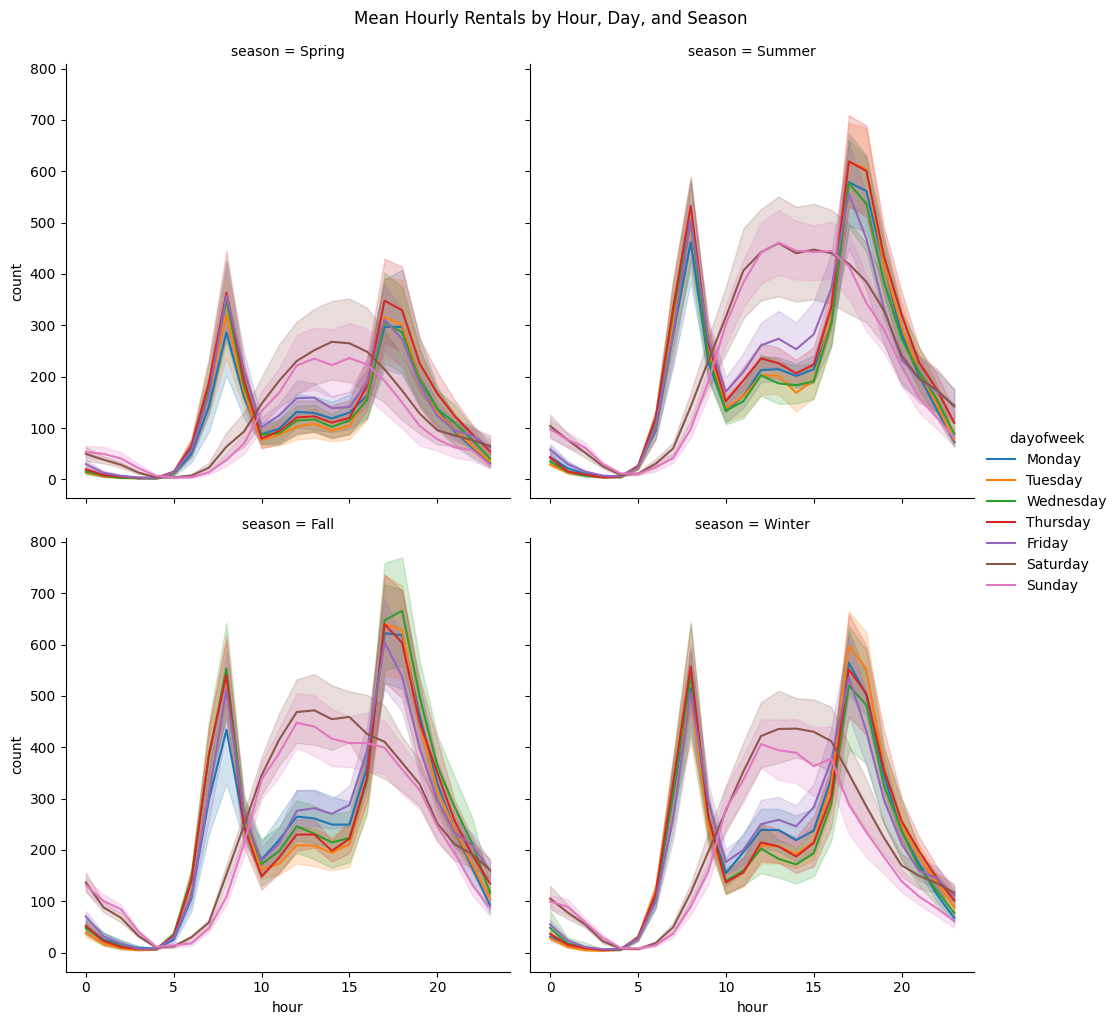

In [11]:
g = sns.relplot(x='hour', y='count', hue='dayofweek', hue_order=days_order, col='season', kind='line', col_wrap=2, data=df)
g.fig.suptitle('Mean Hourly Rentals by Hour, Day, and Season', y=1.02)
plt.savefig('task9_season.png')

10. Plot the the mean and the 95% confidence interval of the hourly total rentals
count versus the period of the day column, which you created in the first part
of the assignment. Which period of the day has the highest rentals count ?
Does this peak period differ for working and non-working days ?

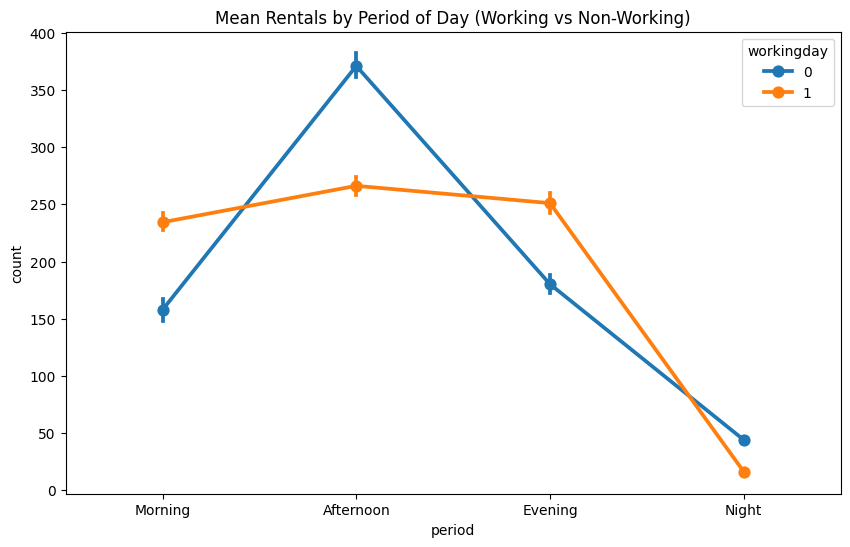

In [12]:
def get_period(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['period'] = df['hour'].apply(get_period)

# Plot mean + 95% CI vs period
plt.figure(figsize=(10, 6))
sns.pointplot(x='period', y='count', hue='workingday', data=df, order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Mean Rentals by Period of Day (Working vs Non-Working)')
plt.savefig('task10_period.png')

11. Plot a heatmap for the correlation matrix of the dataset numerical variables.
What observations can you make ?

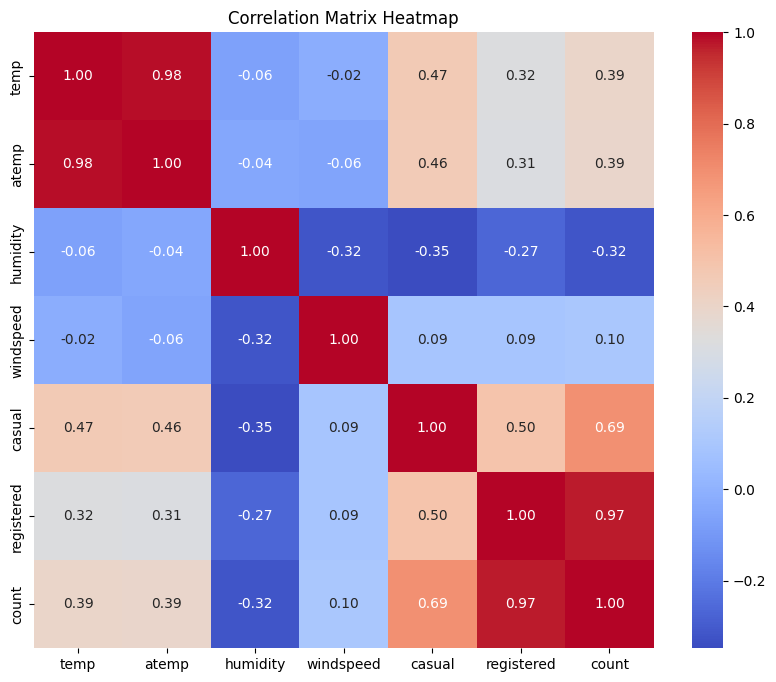

In [13]:
numerical_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
corr_matrix = df[numerical_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.savefig('task11_heatmap.png')